Importing the import library used in this project

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

reading the csv dataset of car

In [8]:
cars = pd.read_csv("imports-85.data")

cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It's look like there is no column name so we will add column name

In [9]:
col_name=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data",names=col_name)
cars.head(100)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


Data cleaning 
By the command .head() we can seen the as many rows of the dataframe,
In our case the column name normalised losses contains "?" so we will replace it by Nan. So that we can use isnull() method to check which column has null value

In [10]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars=cars.replace("?",np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
#numerical column that will be used in knn algorithm
numeric_cols = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system", "engine-size"]

In [13]:
cars_num=cars.drop(numeric_cols, axis=1)

In [14]:
# numerical column
cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
cars_num=cars_num.astype(float)

In [16]:
cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [17]:
cars_num.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
mean=cars_num.mean()

In [19]:
## filling null value using the mean of the particular column
cars_num=cars_num.fillna(mean)

In [20]:
cars_num.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [21]:
cars_num.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [22]:
#all the column are non-null,now we will Seperate features from target column
car_features=cars_num.drop('price',axis=1)

In [23]:
## now we have to perform scaling so that all the important feature should be in the range of 0 to 1
car_features_norm=(car_features-car_features.min())/(car_features.max()-car_features.min())

In [24]:
car_features_norm.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895


In [25]:
price = cars_num['price']
car_features_norm['price']=price
car_features_norm.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


Now we will apply machine learning algorithm

In [26]:
def knn_train_test(features, target_col, df):
    #randomize sets
    #with np.random.seed same number on set will appear every time when it is called
    np.random.seed(1)
    # np.random.permuatation create the list of shuffled index
    randomed_index = np.random.permutation(df.index)
    #reindex will assign the list of shuffled index to feature data 
    randomed_df = df.reindex(randomed_index)

    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    # selecting half of data as tarining data and half as testing data
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor()
    knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    #knn.predict the target for provided data
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [27]:
#Create a list from column names
columns=car_features_norm.columns.tolist()
columns.remove('price')
columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [28]:
#Calculate RMSE values for each feature
rmses = {}
for column in columns:
    rmses[column] = knn_train_test(column,'price',car_features_norm)
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

highway-mpg          4245.734567
curb-weight          4436.523561
width                5030.139338
city-mpg             5085.047194
horsepower           5092.272401
length               5418.778301
wheel-base           5743.877086
bore                 6746.031651
compression-rate     7177.202061
normalized-losses    7374.513274
height               7832.152833
peak-rpm             7965.541705
stroke               8096.653898
dtype: float64

let's modify the function to include k value or the number of neighbors as a parameter. Then we can loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

In [432]:
def knn_train_test2(features, target_col, df,k_val):
    #randomize sets
    #with np.random.seed same number on set will appear every time when it is called
    np.random.seed(1)
    # np.random.permuatation create the list of shuffled index
    randomed_index = np.random.permutation(df.index)
    #reindex will assign the list of shuffled index to feature data 
    randomed_df = df.reindex(randomed_index)

    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    # selecting half of data as tarining data and half as testing data
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    k_rmse = {}
    
    #training
    for k in k_val:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
    
    #test
    #knn.predict the target for provided data
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        
        k_rmse[k]=rmse
    return k_rmse
   


In [437]:
k = [1, 3, 5, 7, 9]
feature_k_rmse = {}
for column in columns:
    feature_k_rmse[column] = knn_train_test2(column,'price',,k)
feature_k_rmse


{'normalized-losses': {1: 6998.7424709166335,
  3: 7038.210876329459,
  5: 7374.513274367573,
  7: 7722.670399388631,
  9: 7507.512182575815},
 'wheel-base': {1: 5400.51418967299,
  3: 5629.538534558065,
  5: 5743.8770860517825,
  7: 6048.744597831812,
  9: 6360.529322830884},
 'length': {1: 6853.715819594109,
  3: 5113.209767682691,
  5: 5418.778300690459,
  7: 5618.149068803402,
  9: 5641.426309574451},
 'width': {1: 5739.245757378005,
  3: 5291.949721784998,
  5: 5030.139338284197,
  7: 4933.6396353832,
  9: 4951.829909070571},
 'height': {1: 10653.050778292903,
  3: 8176.934988463841,
  5: 7832.152832500197,
  7: 7743.870132519971,
  9: 7632.665665042622},
 'curb-weight': {1: 5842.169653813219,
  3: 4527.849193303364,
  5: 4436.523561278551,
  7: 4320.057970537657,
  9: 4181.086220663609},
 'bore': {1: 7930.548590614734,
  3: 6353.8909942494565,
  5: 6746.031650636273,
  7: 7246.705124103924,
  9: 7184.417703627346},
 'stroke': {1: 7345.451363903154,
  3: 7455.212313651712,
  5: 80

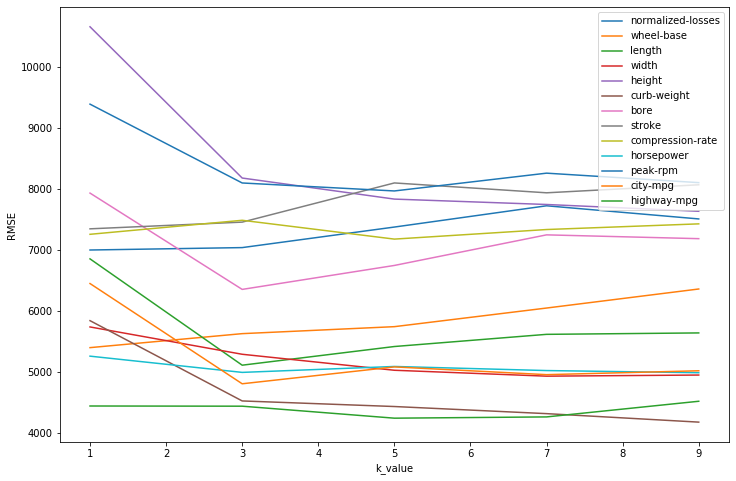

In [438]:
plt.figure(figsize=(12, 8))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    plt.legend()
plt.show()

In [439]:
#now we will find the average of the all k value for each feature and plot it using matplot lib
#and we will print the best feature in sorted order
best_features={}
for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

normalized-losses
average_rmse: 7328.3298407156235
wheel-base
average_rmse: 5836.640746189108
length
average_rmse: 5729.055853269023
width
average_rmse: 5189.3608723801935
height
average_rmse: 8407.734879363907
curb-weight
average_rmse: 4661.537319919279
bore
average_rmse: 7092.318812646347
stroke
average_rmse: 7779.820218812398
compression-rate
average_rmse: 7335.788010683471
horsepower
average_rmse: 5072.792481939121
peak-rpm
average_rmse: 8361.301723732196
city-mpg
average_rmse: 5264.73747397624
highway-mpg
average_rmse: 4384.386988631277


In [440]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['highway-mpg',
 'curb-weight',
 'horsepower',
 'width',
 'city-mpg',
 'length',
 'wheel-base',
 'bore',
 'normalized-losses',
 'compression-rate',
 'stroke',
 'peak-rpm',
 'height']

In [451]:
##Now we know which features have the lowest amount of error, we can begin applying the function to multiple features at once.
def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [454]:

multivariate_best_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


multivariate_best_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', car_features_norm)
multivariate_best_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', car_features_norm)
multivariate_best_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', car_features_norm)
multivariate_best_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', car_features_norm)

In [455]:
multivariate_best_features

{'best_two_rmse': 3824.169112072618,
 'best_three_rmse': 3827.8352950327944,
 'best_four_rmse': 3810.3522602695502,
 'best_five_rmse': 3995.4114238647817}

In [456]:
##Let looks like using the best four features gave us the lowest RMSE.

##Now, let's try varying the K values. We can further tune our machine learning model by finding the optimal K value to use.
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [462]:
k = list(range(1,25))
kmultivariate_best_features = {}
kmultivariate_best_features["best_two_features"] = knn_train_test4(best_two_features, 'price', car_features_norm, k)
kmultivariate_best_features["best_three_features"] = knn_train_test4(best_three_features, 'price', car_features_norm, k)
kmultivariate_best_features["best_four_features"] = knn_train_test4(best_four_features, 'price', car_features_norm, k)
kmultivariate_best_features["best_five_features"] = knn_train_test4(best_five_features, 'price', car_features_norm, k)

In [463]:
kmultivariate_best_features

{'best_two_features': {1: 5249.932394511337,
  2: 4202.760512638935,
  3: 4112.434362434053,
  4: 3907.390889598029,
  5: 3824.169112072618,
  6: 3923.8437448213444,
  7: 3995.0152833991183,
  8: 4197.904356655415,
  9: 4297.7782700578955,
  10: 4268.570915507399,
  11: 4440.986050321422,
  12: 4515.632396595748,
  13: 4616.96114195769,
  14: 4686.730730646389,
  15: 4790.145272509365,
  16: 4839.0099152726625,
  17: 4894.645955680742,
  18: 4935.814976825329,
  19: 5001.065099307257,
  20: 5032.867882289984,
  21: 5063.834351480287,
  22: 5108.94814413344,
  23: 5143.013229837496,
  24: 5197.905337282801},
 'best_three_features': {1: 4561.493637526197,
  2: 3936.679623994573,
  3: 3854.2165093804115,
  4: 3884.2318689741,
  5: 3827.8352950327944,
  6: 3929.2802782883336,
  7: 4025.1280155633967,
  8: 4211.459616296103,
  9: 4339.21740262898,
  10: 4325.405050129493,
  11: 4411.480604624558,
  12: 4473.977463684679,
  13: 4579.926513187371,
  14: 4634.701136830346,
  15: 4696.610324152

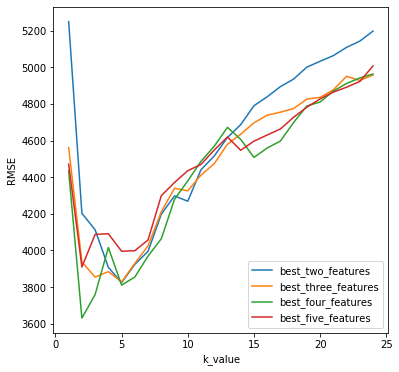

In [464]:
plt.figure(figsize=(6, 6))

for key, value in kmultivariate_best_features.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()


From the chart above, we can see that choosing the best four features with a K value of 2 will give us the RMSE of 3630. That is it for now though, the goal of this project is to explore the fundamentals of machine learning.